Importing important libs

In [2]:
import pandas as pd
import seaborn as sns

Getting the data

In [10]:
data = pd.read_csv('./FIC.Full CSV.csv')

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
363,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.5,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.0,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.8,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.6,2,0,7,4,1,COUGH.BLEEDING,1,0,32
367,50,41-50,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,0.6,2,1,7,1,1,BODY.PAIN,1,0,15


Exploring the data

<AxesSubplot:>

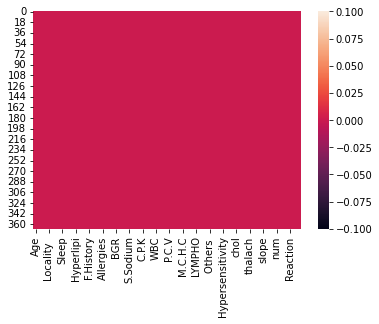

In [4]:
sns.heatmap(data.isna())

Prepare the data for the model

In [11]:
data = pd.get_dummies(data)

All the data is filled, now we split it into train and test data

In [13]:
from sklearn.model_selection import train_test_split
X = data.drop('Reaction', axis=1)
y = data['Reaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Now get our model and train it

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/home/mklton/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

See how well the model works

In [16]:
model.score(X_test, y_test)

0.8114754098360656